## <center> Final Project - Stage 1 (EDA) </center>

**Kelompok : "ASKLEPIOS"** <br>
**Nama Anggota :** <br>
        - Awalsyah Rinanto Putra <br>
        - Fathah Oscar <br>
        - M Rizky Septiansyah <br>
        - Hermawan Febrianto <br>
        - Devi Puji Ayuningsih <br>
        - Anggita Citanegara Lubis

In [3]:
# import library yang diperlukan

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [4]:
# ubah parameter default matplotlib

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Dataset

In [5]:
# load dataset

df = pd.read_csv('ECommerce_finpro.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## 1. Descriptive Statistics

### A. NULL Values and Data Type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Terdapat 7 kolom dengan tipe data numerikal dan 4 kolom dengan tipe data string/kategorikal.

### B. Missing Values

In [7]:
# Rename kolom
df = df.rename(columns={'Warehouse_block':'Warehouse','Mode_of_Shipment':'Shipment','Customer_care_calls':'Calls',
                        'Customer_rating':'Rating','Cost_of_the_Product':'Cost','Prior_purchases':'Purchases',

                        'Product_importance':'Importance','Discount_offered':'Discount','Weight_in_gms':'Weight (gram)','Reached.on.Time_Y.N':'Late'})

In [8]:
# cek nilai kosong/null tiap kolom

df.isna().sum()

ID               0
Warehouse        0
Shipment         0
Calls            0
Rating           0
Cost             0
Purchases        0
Importance       0
Gender           0
Discount         0
Weight (gram)    0
Late             0
dtype: int64

Tidak ada baris dengan nilai kosong (null).

### C. Statistical Summary

In [9]:
# melihat summary statistik sederhana pada kolom dengan tipe data numerik 

df_num = df[['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)']]
df_num.describe()

,Calls,Rating,Cost,Purchases,Discount,Weight (gram)
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [10]:
# melihat summary statistik sederhana pada kolom dengan tipe data string/kategrikal

df_cat = df[['Warehouse','Shipment','Importance','Gender']]
df_cat.describe()

,Warehouse,Shipment,Importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [11]:
# melihat summary statistik sederhana pada kolom Late (target/label)

df['Late'].describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Late, dtype: float64

In [12]:
# pengelompokan feature numerical dan categorical

numericals = ['Cost', 'Discount', 'Weight (gram)', 'Calls', 'Purchases' ]
category = ['Warehouse', 'Shipment', 'Rating','Importance', 'Gender']

In [15]:
# Menghitung Variance kolom numerik
round(df[numericals].var(), 2)

Cost                2310.08
Discount             262.62
Weight (gram)    2674458.75
Calls                  1.30
Purchases              2.32
dtype: float64

In [14]:
# Menghitung Standard Deviation kolom numerik
round(df[numericals].std(), 2)

Cost               48.06
Discount           16.21
Weight (gram)    1635.38
Calls               1.14
Purchases           1.52
dtype: float64

In [16]:
# melihat jumlah masing-masing value pada feature categorical

for i in category:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom Warehouse:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse, dtype: int64

Value count kolom Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Shipment, dtype: int64

Value count kolom Rating:
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Rating, dtype: int64

Value count kolom Importance:
low       5297
medium    4754
high       948
Name: Importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



### D. Hasil Observasi  <br>

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
    Semua tipe data sudah sesuai <br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
    Tidak ada kolom yang memiliki missing value <br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
    Jika dilihat dari nilai max, variabel Purchases dan Discount kemungkinan memiliki nilai outlier

## 2. Univariate Analysis

### A. Numerical Features

#### Boxplot

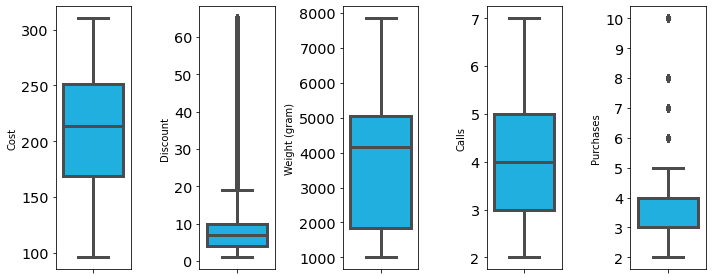

In [18]:
# melihat boxplot pada feature numerical

plt.figure(figsize=(10,4))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='deepskyblue', orient='v')
    plt.tight_layout()

Pada feature discount dan purchases terdapat outliier.

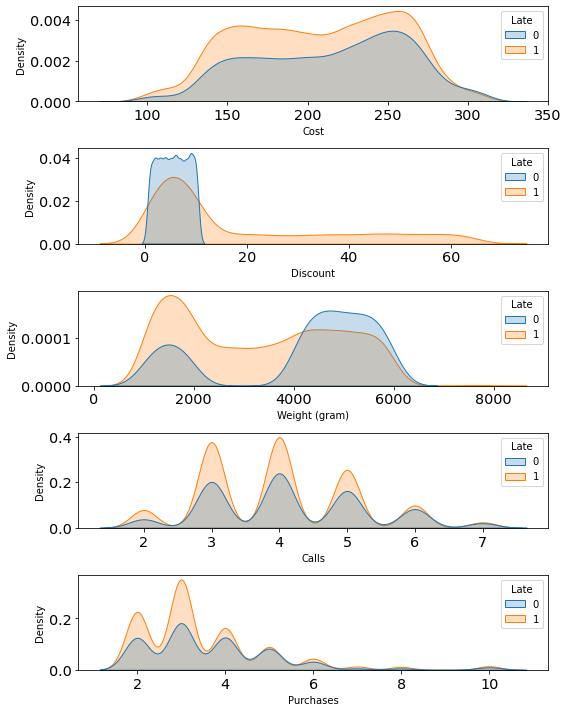

In [19]:
# melihat distribution plot pada feature numericals

plt.figure(figsize=(8,10))
for i in range(0, len(numericals)):
    plt.subplot(5,1, i+1)
    sns.kdeplot(data=df, x=df[numericals[i]], hue='Late', fill='True')
    plt.tight_layout()

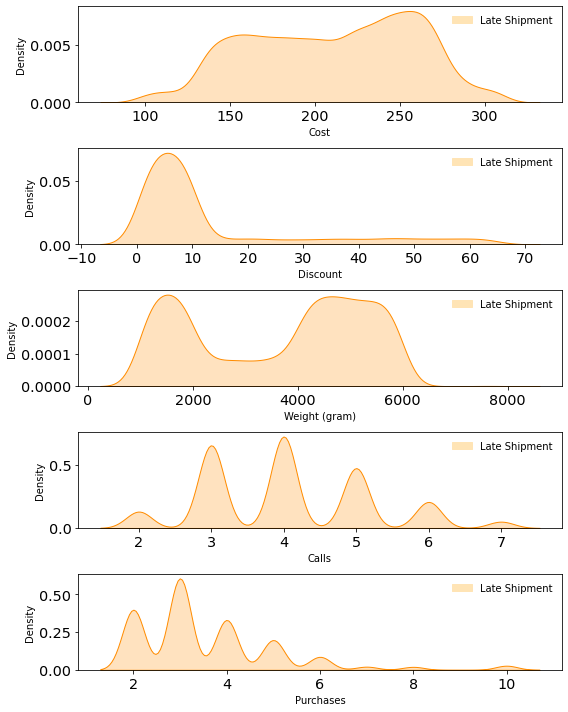

In [20]:
Latefix = df[df['Late']>0]
plt.figure(figsize=(8,10))
for i in range(0, len(numericals)):
    plt.subplot(5,1, i+1)
    sns.kdeplot(data=Latefix, x=df[numericals[i]], color='darkorange', fill='True')
    Orange_patch = mpatches.Patch(color='moccasin', label='Late Shipment')
    plt.legend(handles=[Orange_patch], frameon=False, loc=1)
    plt.tight_layout()

In [21]:
# Menghitung nilai skew
df[numericals].skew(axis=0, skipna=True)

Cost            -0.157117
Discount         1.798929
Weight (gram)   -0.249747
Calls            0.391926
Purchases        1.681897
dtype: float64

Pada feature purchases dan discount, terlihat distribution plotnya sangat positively skewed dengan nilai skewness cukup besar.

#### B. Category

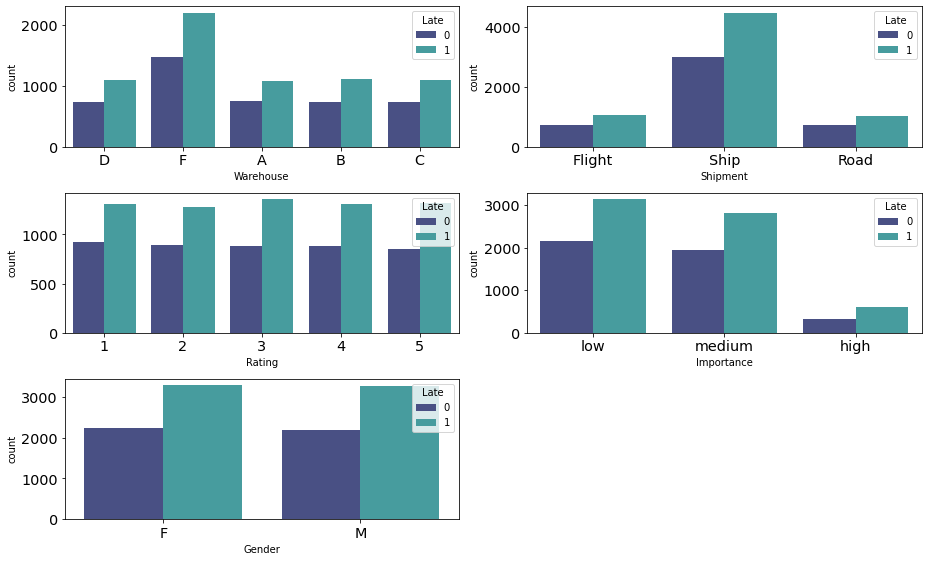

In [22]:
# melihat countplot pada feature categorical

plt.figure(figsize=(13,10))
for i in range(0, len(category)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x = df[category[i]], orient='v', hue=df['Late'], palette='mako')
    plt.tight_layout()

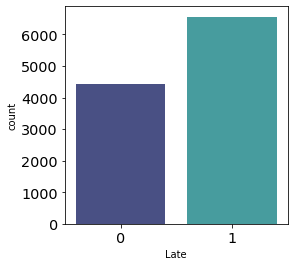

In [23]:
# melihat countplot pada target 'Late'

plt.figure(figsize=(4, 4))
sns.countplot(x=df['Late'], data=df, palette='mako')
plt.show()

Dari countplot di atas, terlihat label late bernilai 1 (barang terlambat) lebih banyak jumlanya dibanding label late bernilai 0 (on time).

#### C. Hasil Observasi  <br>
- Variabel Purchases dan Discount memiliki outlier dan membentuk pola positively Skewed
- Variabel Cost memiliki distribusi yang paling mendekati distribusi normal
- Warehouse block yang paling banyak digunakan adalah Warehouse F
- Shipment mode yang dominan adalah pengiriman dengan kapal
- Jumlah sampel yang mengalami keterlambatan pengiriman lebih banyak <br>

Apa yang harus di-follow up saat data pre-processing? <br>
- Remove outlier
- Melakukan OHE pada feature Warehouse dan Shipment
- Melakukan label encoding pada feature Gender dan Product Importance
- Melakukan standardisasi pada semua feature numerik
- Melakukan log transformation pada feature Discount dan Purchases

## 3. Multivariate Analysis

### A. Heatmap Plot

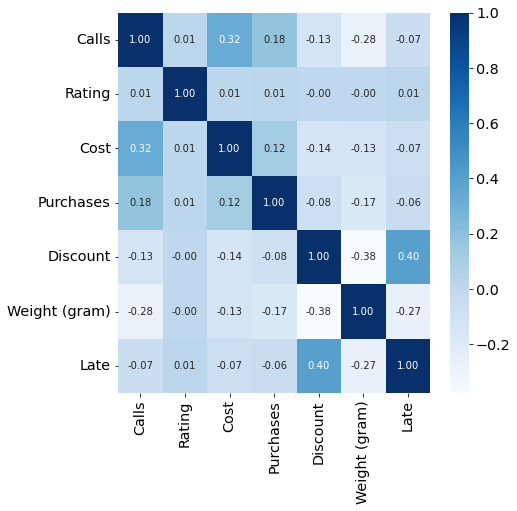

In [24]:
df_corr = df.drop(['ID'], axis=1) # drop kolom ID karena tidak punya pengaruh terhadap target/label Late
plt.figure(figsize=(7, 7))
sns.heatmap(df_corr.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### B. Scatter Plot

Plot antara masing-masing feature numerical.

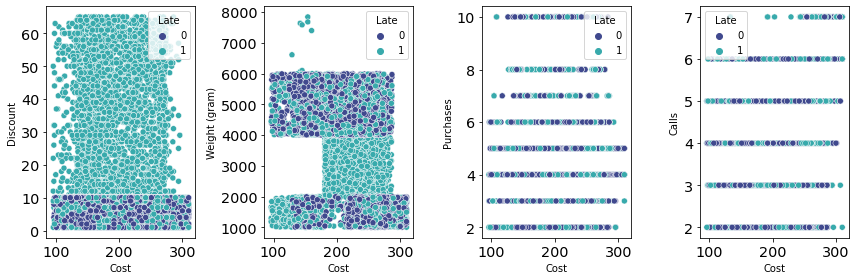

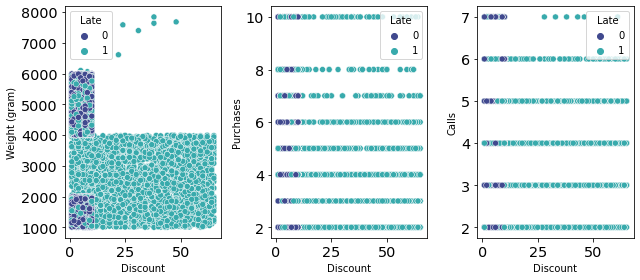

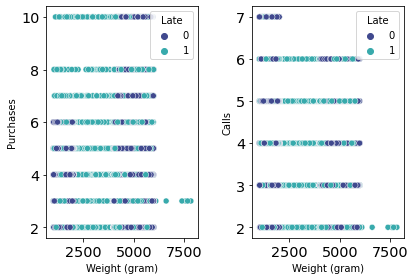

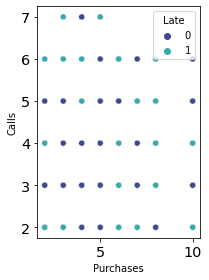

In [27]:
# plot feature cost terhadap feature numerik lain
s1 = ['Discount','Weight (gram)', 'Purchases', 'Calls']
fig = plt.figure(figsize=(12, 4))
for i in range(0, len(s1)): 
    ax = fig.add_subplot(1, 4, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Cost', y=s1[i], hue='Late', palette='mako')
    plt.tight_layout() 

# plot feature Discount terhadap feature numerik lain
s2 = ['Weight (gram)', 'Purchases', 'Calls']
fig = plt.figure(figsize=(9, 4))
for i in range(0, len(s2)): 
    ax = fig.add_subplot(1, 3, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Discount', y=s2[i], hue='Late', palette='mako')
    plt.tight_layout() 

# plot feature Weight terhadap feature numerik lain
s3 = [ 'Purchases', 'Calls']
fig = plt.figure(figsize=(6, 4))
for i in range(0, len(s3)): 
    ax = fig.add_subplot(1, 2, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Weight (gram)', y=s3[i], hue='Late', palette='mako')
    plt.tight_layout() 

# plot feature Purchases terhadap feature Calls
fig = plt.figure(figsize=(3, 4))
sns.scatterplot(data=df, x='Purchases', y='Calls', hue='Late', palette='mako')
plt.tight_layout() 

### C. Category Plot

Plot antara masing-masing feature categorical dengan feature numerical

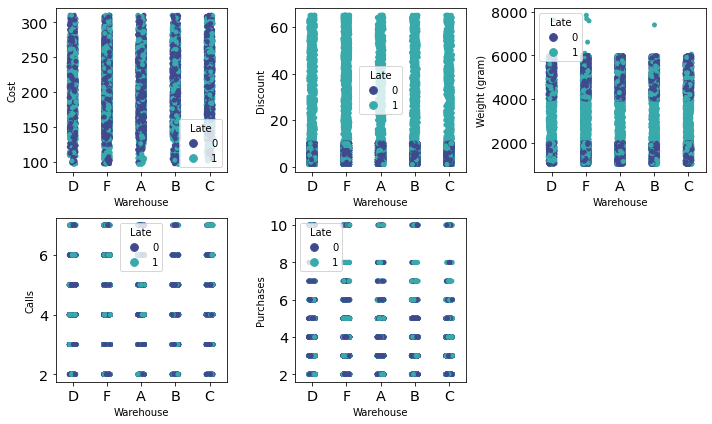

In [29]:
# category plot feature Warehouse terhadapt feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Warehouse', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

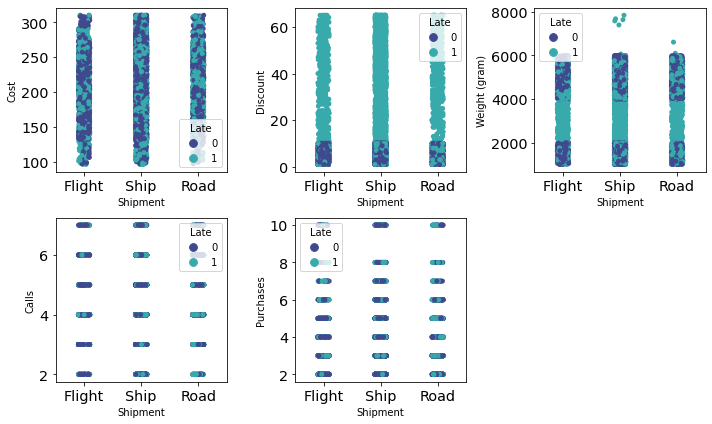

In [30]:
# category plot feature Shipment terhadapt feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Shipment', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout()

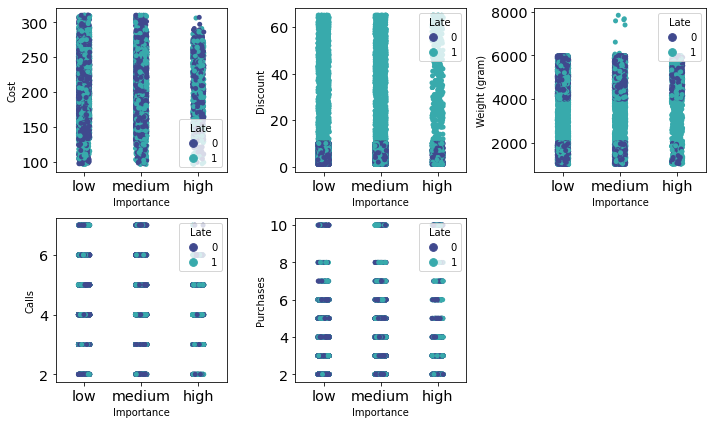

In [31]:
# category plot feature Product Importance terhadap feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Importance', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

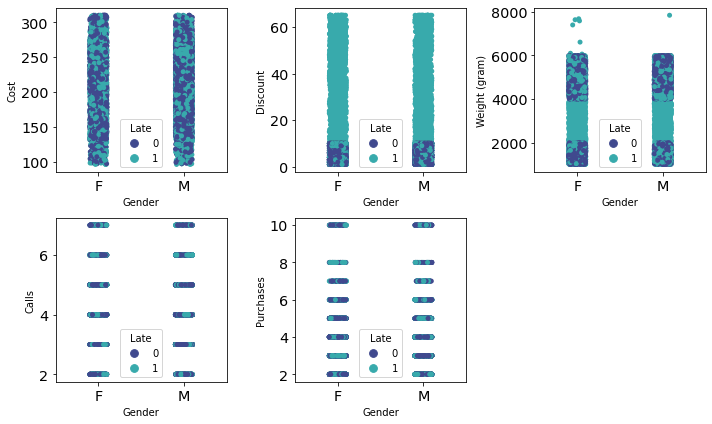

In [32]:
# category plot feature Gender terhadap feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Gender', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

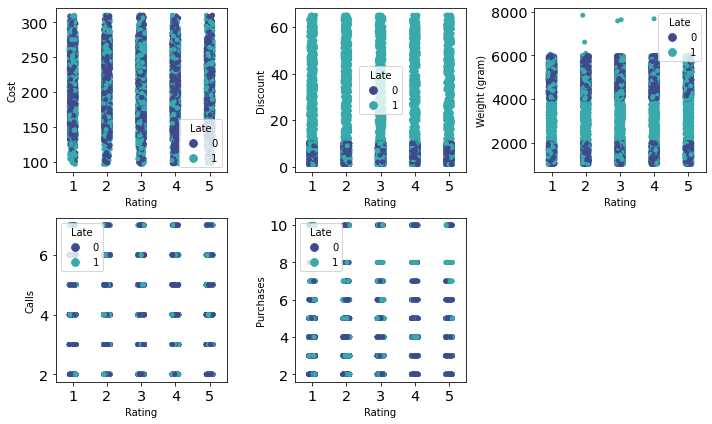

In [33]:
# category plot feature Rating terhadap feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Rating', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout()

#### D. Hasil Observasi  <br>

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana 
saja yang paling relevan dan harus dipertahankan? <br>
Discount dan Weight <br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu 
dilakukan terhadap feature itu? <br>
Weight terhadap Calls <br>
Weight terhadap Discount <br>
Cost terhadap Calls

## 4. Business Insight

### A. Late Shipment Based On Discount

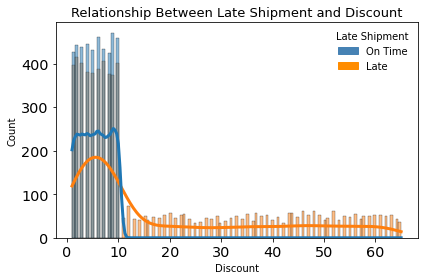

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Discount', hue='Late', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Discount', fontsize=13)
plt.tight_layout()

Untuk pembelian produk dengan discount diatas 10% banyak mengalami keterlambatan pengiriman. <br>
Dalam hal ini pihak e-commerce perlu memberikan notifikasi keterlambatan pengiriman kepada customer ketika melakukan pembelian dengan menggunakan discount yang besar yang memungkinkan produk yang dipesan tidak terkirim tepat waktu.

### B. Late Shipment Based on Product Weight

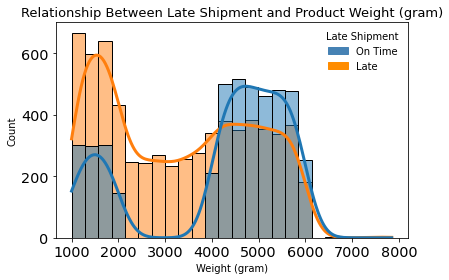

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Weight (gram)', hue='Late', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Product Weight (gram)', fontsize=13)
plt.tight_layout()

Barang dengan berat 2-4 Kg mengalami keterlambatan pengiriman. <br>
Dalam hal ini, pihak e-commerce perlu memberikan notifikasi keterlambatan pengiriman kepada customer yang membeli produk di rentang berat produk 2-4 kg sebelum customer melakukan transaksi.

### C. Late Shipment Based on Customer Care Calls

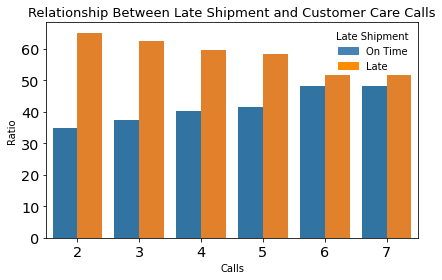

In [38]:
df_Calls1 = df.groupby(['Calls', 'Late']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah x'})
df_Calls2 = df.groupby(['Calls']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah y'})
df_Calls= df_Calls1.merge(df_Calls2,
                              left_on = ['Calls'],
                              right_on = ['Calls'],
                              how = 'inner')
df_Calls['Ratio'] = np.round(df_Calls['Jumlah x']*100 / df_Calls['Jumlah y'], 2)


plt.figure(figsize=(6,4))
sns.barplot(x='Calls', y ='Ratio', data = df_Calls, hue='Late')
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Customer Care Calls', fontsize=13)
plt.tight_layout()

Berdasarkan data jumlah keterlambatan pengiriman menurun dengan meningkatnya jumlah telepon yang diterima oleh customer care.
Perusahaan perlu mencari informasi mengenai isi telepon customer kepada customer care (siapa penelpon, isi telepon), sehingga bisa menentukan korelasi dengan jumlah keterlambatan pengiriman.

Rekomendasi dengan Asumsi: 
1. Bila di asumsikan bahwa pelanggan menelpon untuk melakukan konfirmasi pemesanan, maka bisa dilakukan proses konfirmasi pemesanan dari pelanggan memberikan pengingat kepada penjual untuk segera melakukan konfirmasi ketersediaan barang dan kesiapaan pengiriman kepada bagian pengiriman atau kurir. (bisa dengan aplikasi atau ditambahkan pada petugas tertentu).
2. Bila di asumsikan bahwa penjual menelpon untuk melakukan konfirmasi kesediaan pesanan dan barang siap di kirim, maka bisa dilakukan proses otomatisasi saat penjual konfirmasi kesediaan barang, langsung barang disiapkan untuk di kirim pada hari yang sama dan mengirimkan konfirmasi untuk kurir mengirimkan.

# <center> Final Project - Stage 2 (Data Pre-Processing) </center>

**Kelompok : "ASKLEPIOS"** <br>
**Nama Anggota :** <br>
        - Awalsyah Rinanto Putra <br>
        - Fathah Oscar <br>
        - M Rizky Septiansyah <br>
        - Hermawan Febrianto <br>
        - Devi Puji Ayuningsih <br>
        - Anggita Citanegara Lubis

In [40]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ubah parameter default matplotlib dengan rcParams
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [41]:
# Load data
df = pd.read_csv(r'Ecommerce_finpro.csv')

In [42]:
# Rename kolom 
df = df.rename(columns={'Warehouse_block':'Warehouse',
                        'Mode_of_Shipment':'Shipment',
                        'Customer_care_calls':'Calls',
                        'Customer_rating':'Rating',
                        'Cost_of_the_Product':'Cost',
                        'Prior_purchases':'Purchases',
                        'Product_importance':'Importance',
                        'Discount_offered':'Discount',
                        'Weight_in_gms':'Weight (gram)',
                        'Reached.on.Time_Y.N':'Late'})

In [47]:
# pengelompokkan kolom berdasarkan tipe data dan jenis feature 

str = ['Warehouse', 'Shipment', 'Importance', 'Gender', ] #kolom dengan tipe data string/object
int = ['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)'] #kolom dengan tipe data integer/float

#pengelompokkan jenis feature
cat = ['Warehouse', 'Shipment', 'Importance', 'Gender', 'Rating'] #feature categorical
num = [ 'Cost', 'Discount', 'Weight (gram)', 'Calls', 'Purchases'] #feature numerical 

## 1. Data Cleansing

### A. Handle Missing Values

In [48]:
# cek missing value

df.isna().sum()

ID               0
Warehouse        0
Shipment         0
Calls            0
Rating           0
Cost             0
Purchases        0
Importance       0
Gender           0
Discount         0
Weight (gram)    0
Late             0
dtype: int64

<b> Tidak ada missing values pada dataset </b>

### B. Handle Duplicated Data

In [50]:
# cek baris yang duplikat

df.duplicated().sum()

0

<b> Tidak ada data yang terduplikasi pada dataset </b>

### C. Handle Outliers

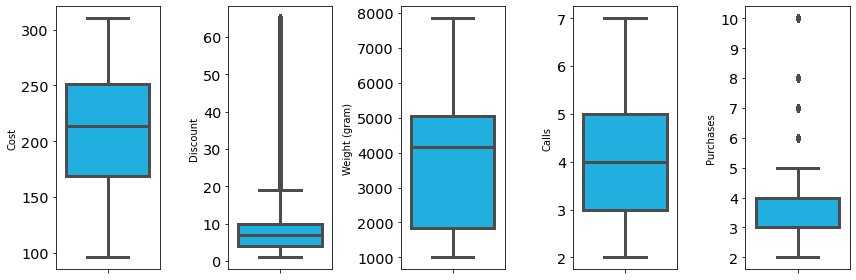

In [51]:
# cek boxplot kolom tipe data int/float uuntuk melihat outlier

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='deepskyblue', orient='v')
    plt.tight_layout()

Hanya feature discount dan purchase yang merupakan feature numerik dan mempunyai outlier.

#### Remove Outlier Berdasarkan Z-Score

In [52]:
# Remove outlier Z-Score pada feature Discount

print(f'Jumlah baris sebelum outlier dihilangkan: {len(df)}')

zscore = abs(stats.zscore(df['Discount'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah outlier dihilangkan: {len(df)}')

Jumlah baris sebelum outlier dihilangkan: 10999
Jumlah baris setelah outlier dihilangkan: 10818


In [53]:
# Remove outlier Z-Score pada feature Purchases

print(f'Jumlah baris sebelum outlier dihilangkan: {len(df)}')

zscore = abs(stats.zscore(df['Purchases'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah outlier dihilangkan: {len(df)}')

Jumlah baris sebelum outlier dihilangkan: 10818
Jumlah baris setelah outlier dihilangkan: 10642


#### Remove Outlier Berdasarkan IQR

In [54]:
# Remove outliers menggunakan batas atas dan bawah IQR pada feature discount

Q11 = df['Purchases'].quantile(0.25)
Q31 = df['Purchases'].quantile(0.75)
IQR1 = Q31-Q11
low_limit1 = Q11 - (1.5*IQR1)
high_limit1 = Q31 + (1.5*IQR1)
filtered_entries = ((df['Purchases'] >= low_limit1) 
                        & (df['Purchases'] <= high_limit1))
df1 = df[filtered_entries]

print(f'Jumlah baris setelah outlier dihilangkan: {len(df1)}')

Jumlah baris setelah outlier dihilangkan: 9837


In [55]:
# Remove outliers menggunakan batas atas dan bawah IQR pada feature discount

Q11 = df1['Discount'].quantile(0.25)
Q31 = df1['Discount'].quantile(0.75)
IQR1 = Q31-Q11
low_limit1 = Q11 - (1.5*IQR1)
high_limit1 = Q31 + (1.5*IQR1)
filtered_entries = ((df['Discount'] >= low_limit1) 
                        & (df['Discount'] <= high_limit1))
df2 = df[filtered_entries]

print(f'Jumlah baris setelah outlier dihilangkan: {len(df2)}')

Jumlah baris setelah outlier dihilangkan: 8653


Setelah dilakukan penghilangan outlier berdasarkan IQR, terlihar ada banyak sekali baris yang hilang (lebih dari 2000 baris) yang berpotensi menghilangkan informasi penting untuk keperluan supervised learning, oleh karena itu kami memutuskan langkah pre-processing data selanjutnya tidak memakai data yang sudah dilakukan remove outlier dari IQR.

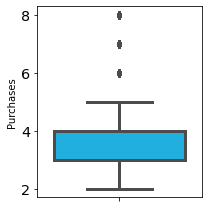

In [56]:
plt.figure(figsize = (3,3))
sns.boxplot(y=df['Purchases'], color='deepskyblue', orient='v')
plt.tight_layout()

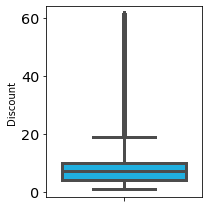

In [57]:
plt.figure(figsize = (3,3))
sns.boxplot(y=df['Discount'], color='deepskyblue', orient='v')
plt.tight_layout()

### D. Feature Transformation

#### Log Transformation

<AxesSubplot:xlabel='Discount', ylabel='Density'>

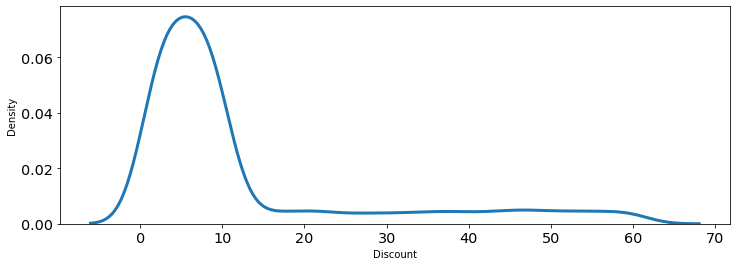

In [58]:
sns.kdeplot(df['Discount']) # hanya discount dan purchases yang merupakan feature numerik distribusinya positively skewed

<AxesSubplot:xlabel='Purchases', ylabel='Density'>

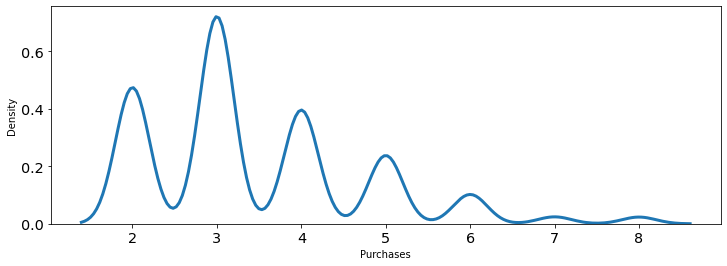

In [59]:
sns.kdeplot(df['Purchases']) # hanya discount dan purchases yang merupakan feature numerik distribusinya positively skewed

In [60]:
# cek nilai skewness feature discount

print('skewness feature diskon: ', df['Discount'].skew(axis=0, skipna=True))

skewness feature diskon:  1.861919412884021


In [61]:
# cek nilai skewness feature purchases

print('skewness feature purchases: ', df['Purchases'].skew(axis=0, skipna=True))

skewness feature purchases:  1.0124137039294367


Karena skewness di 2 feature ini cukup besar, maka dilakukan log transformation.

<AxesSubplot:xlabel='Discount', ylabel='Density'>

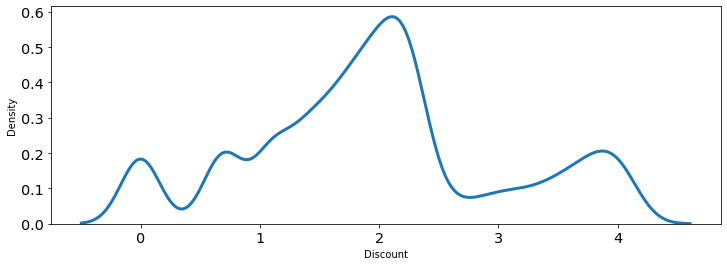

In [62]:
# log transformation feature discount

sns.kdeplot(np.log(df['Discount']))

<AxesSubplot:xlabel='Purchases', ylabel='Density'>

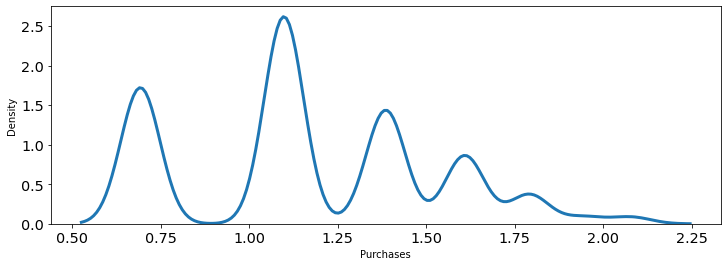

In [63]:
# log transformation feature purchases

sns.kdeplot(np.log(df['Purchases']))

In [64]:
# cek nilai skewness log discount

print('skewness feature diskon:', np.log(df['Discount']).skew(axis=0, skipna=True))

skewness feature diskon: 0.20425712287711678


In [65]:
# cek nilai skewness log purchases

print('skewness feature purchases:', np.log(df['Purchases']).skew(axis=0, skipna=True))

skewness feature purchases: 0.22520898855880445


In [66]:
# masukan nilai log ke dataframe

df['log_purchases'] = np.log(df['Purchases'])
df['log_discount'] = np.log(df['Discount'])

In [67]:
# update dataset dengan tambahan kolom log_purchases dan log_discount

df.sample(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,log_purchases,log_discount
8618,8619,A,Road,2,1,258,5,low,F,9,1548,1,1.609438,2.197225
1253,1254,F,Ship,5,3,197,2,low,F,48,2481,1,0.693147,3.871201
4985,4986,F,Ship,6,1,152,2,low,F,3,1340,0,0.693147,1.098612
118,119,C,Road,2,5,263,3,low,F,5,2947,1,1.098612,1.609438
5897,5898,F,Flight,5,4,151,5,low,F,1,4122,0,1.609438,0.000000


#### Standardization

Dilakukan pada feature Cost, Discount, dan Weight yang merupakan feature numerik dan memiliki nilai variance yang besar.

In [68]:
# Standardization pada kolom tipe numerik
df['Std_Cost'] = StandardScaler().fit_transform(df['Cost'].values.reshape(len(df), 1))
df['Std_Disc'] = StandardScaler().fit_transform(df['log_discount'].values.reshape(len(df), 1))
df['Std_Weight'] = StandardScaler().fit_transform(df['Weight (gram)'].values.reshape(len(df), 1))
df['Std_Purchases'] = StandardScaler().fit_transform(df['log_purchases'].values.reshape(len(df), 1))
df['Std_Calls'] = StandardScaler().fit_transform(df['Calls'].values.reshape(len(df), 1))

In [69]:
# cek nilai variance sebelum distandarisasi

std_feature1 = ['Weight (gram)', 'Cost', 'log_discount', 'log_purchases', 'Calls']

print('variance :') 
round(df[std_feature1].var(), 2)

variance :


Weight (gram)    2689104.90
Cost                2311.48
log_discount           1.12
log_purchases          0.13
Calls                  1.31
dtype: float64

In [70]:
# cek nilai standar deviasi sebelum distandarisasi

print('standard deviation :')
round(df[std_feature1].std(), 2)

standard deviation :


Weight (gram)    1639.85
Cost               48.08
log_discount        1.06
log_purchases       0.35
Calls               1.15
dtype: float64

Terdapat nilai variance dan standar deviasi yang besar pada feature Weight dan Cost.

In [71]:
# cek nilai variance setelah distandarisasi
std_feature2 = ['Std_Cost', 'Std_Disc', 'Std_Weight', 'Std_Purchases', 'Std_Calls']

print('variance :')
round(df[std_feature2].var(), 2)

variance :


Std_Cost         1.0
Std_Disc         1.0
Std_Weight       1.0
Std_Purchases    1.0
Std_Calls        1.0
dtype: float64

In [72]:
# cek nilai standar deviasi setelah distandarisasi

print('standard deviation :')
round(df[std_feature2].std(), 2)

standard deviation :


Std_Cost         1.0
Std_Disc         1.0
Std_Weight       1.0
Std_Purchases    1.0
Std_Calls        1.0
dtype: float64

Nilai variance dan standar deviasi pada 5 feature tersebut semuanya sudah bernilai 1 setelah dilakukan standarisasi.

#### Normalization


Dilakukan pada feature Cost, Discount, Purchases, Calls dan Weight yang merupakan feature numerik dan memiliki nilai variance yang besar.

In [74]:
# Normalization pada feature numerik

df['Norm_Cost'] = MinMaxScaler().fit_transform(df['Cost'].values.reshape(len(df), 1))
df['Norm_Disc'] = MinMaxScaler().fit_transform(df['log_discount'].values.reshape(len(df), 1))
df['Norm_Weight'] = MinMaxScaler().fit_transform(df['Weight (gram)'].values.reshape(len(df), 1))
df['Norm_Purchases'] = MinMaxScaler().fit_transform(df['log_purchases'].values.reshape(len(df), 1))
df['Norm_Calls'] = MinMaxScaler().fit_transform(df['Calls'].values.reshape(len(df), 1))

In [75]:
# cek nilai min dan max setelah dinormalisasi

norm_feature2 = ['Norm_Weight', 'Norm_Cost', 'Norm_Disc', 'Norm_Purchases', 'Norm_Calls']
df[norm_feature2].describe()

,Norm_Weight,Norm_Cost,Norm_Disc,Norm_Purchases,Norm_Calls
count,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,0.386489,0.535414,0.477102,0.349802,0.413137
std,0.239569,0.224663,0.256873,0.255982,0.229070
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.122133,0.345794,0.337226,0.292481,0.200000
50%,0.463258,0.556075,0.473357,0.292481,0.400000
75%,0.593535,0.724299,0.560121,0.500000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Semua nilai min dan max pada feature yang dinormalisasi sudah bernilai 0 dan 1.

In [76]:
# update dataset setelah dilakukan feature transformasi

df.sample(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,...,Std_Cost,Std_Disc,Std_Weight,Std_Purchases,Std_Calls,Norm_Cost,Norm_Disc,Norm_Weight,Norm_Purchases,Norm_Calls
8103,8104,B,Ship,3,2,161,3,medium,F,1,...,-1.031263,-1.857436,1.287061,-0.223934,-0.930489,0.303738,0.000000,0.694814,0.292481,0.2
2965,2966,F,Ship,3,5,126,2,low,F,29,...,-1.759284,1.331528,-1.496863,-1.366573,-0.930489,0.140187,0.819119,0.027904,0.000000,0.2
1715,1716,F,Ship,3,3,275,3,low,F,61,...,1.340004,2.035726,-0.929101,-0.223934,-0.930489,0.836449,1.000000,0.163915,0.292481,0.2
2480,2481,A,Flight,5,5,209,3,low,M,49,...,-0.032835,1.828274,0.150317,-0.223934,0.815788,0.528037,0.946714,0.422498,0.292481,0.6
2448,2449,D,Road,5,3,136,3,medium,F,13,...,-1.551278,0.571674,-1.341964,-0.223934,0.815788,0.186916,0.623943,0.065011,0.292481,0.6


Tampilan dataset setelah dilakukan normalisasi dan standarisasi.

### E. Feature Encoding

#### Label Encoding

In [77]:
# label encoding pada feature gender (2 unique values) dan Product Importance (feature kategorikal yang ordinal)

# mapping feature gender
mapping_Gender = {
    'F' : 0,
    'M' : 1
}

# mapping feature product importance
mapping_Importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

# replace kolom gender yang telah dikuantifikasi di dataset
df['Gender'] = df['Gender'].map(mapping_Gender)
df['Importance'] = df['Importance'].map(mapping_Importance)

df

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,...,Std_Cost,Std_Disc,Std_Weight,Std_Purchases,Std_Calls,Norm_Cost,Norm_Disc,Norm_Weight,Norm_Purchases,Norm_Calls
0,1,D,Flight,4,2,177,3,0,0,44,...,-0.698454,1.726343,-1.471860,-0.223934,-0.057350,0.378505,0.920532,0.033893,0.292481,0.4
1,2,F,Flight,4,5,216,2,0,1,59,...,0.112769,2.004155,-0.340605,-1.366573,-0.057350,0.560748,0.991891,0.304894,0.000000,0.4
2,3,A,Flight,2,2,183,4,0,1,48,...,-0.573650,1.808746,-0.166190,0.586781,-1.803627,0.406542,0.941698,0.346676,0.500000,0.0
3,4,B,Flight,3,3,176,4,1,1,10,...,-0.719254,0.323204,-1.506011,0.586781,-0.930489,0.373832,0.560121,0.025712,0.500000,0.2
4,5,C,Flight,2,2,184,3,1,0,46,...,-0.552850,1.768441,-0.708949,-0.223934,-1.803627,0.411215,0.931345,0.216654,0.292481,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,1,0,1,...,0.861590,-1.857436,-1.285858,1.215620,-0.057350,0.728972,0.000000,0.078451,0.660964,0.4
10995,10996,B,Ship,4,1,232,5,1,0,6,...,0.445579,-0.160568,-1.463322,1.215620,-0.057350,0.635514,0.435859,0.035939,0.660964,0.4
10996,10997,C,Ship,5,4,242,5,0,0,4,...,0.653585,-0.544560,-1.519427,1.215620,0.815788,0.682243,0.337226,0.022498,0.660964,0.6
10997,10998,F,Ship,5,2,223,6,1,1,2,...,0.258373,-1.200998,-1.485886,1.729420,0.815788,0.593458,0.168613,0.030533,0.792481,0.6


In [78]:
df['Gender'].value_counts()

0    5356
1    5286
Name: Gender, dtype: int64

In [79]:
df['Importance'].value_counts()

0    5173
1    4587
2     882
Name: Importance, dtype: int64

Feature Gender dan Product Importance sudah bertipe numerik.

#### One Hot Encoding

In [80]:
# one hot encoding di feature Warehouse dan Shipment (feature kategorikal yang tidak bersifat ordinal)

for cat in ['Warehouse', 'Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [81]:
df

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,...,Norm_Purchases,Norm_Calls,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
0,1,D,Flight,4,2,177,3,0,0,44,...,0.292481,0.4,0,0,0,1,0,1,0,0
1,2,F,Flight,4,5,216,2,0,1,59,...,0.000000,0.4,0,0,0,0,1,1,0,0
2,3,A,Flight,2,2,183,4,0,1,48,...,0.500000,0.0,1,0,0,0,0,1,0,0
3,4,B,Flight,3,3,176,4,1,1,10,...,0.500000,0.2,0,1,0,0,0,1,0,0
4,5,C,Flight,2,2,184,3,1,0,46,...,0.292481,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,1,0,1,...,0.660964,0.4,1,0,0,0,0,0,0,1
10995,10996,B,Ship,4,1,232,5,1,0,6,...,0.660964,0.4,0,1,0,0,0,0,0,1
10996,10997,C,Ship,5,4,242,5,0,0,4,...,0.660964,0.6,0,0,1,0,0,0,0,1
10997,10998,F,Ship,5,2,223,6,1,1,2,...,0.792481,0.6,0,0,0,0,1,0,0,1


Feature Warehouse dan Shipment sudah diencoding menjadi kolom-kolom baru yang tipenya numerik.

### F. Handle Class Imbalance

In [82]:
#cek ratio jumlah nilai target

df_late = df.groupby('Late').agg({'ID':'count'}).reset_index().rename(columns={'ID':'Jumlah'})
df_late['Ratio'] = df_late['Jumlah']*100/df_late['Jumlah'].sum()
df_late

,Late,Jumlah,Ratio
0,0,4360,40.969743
1,1,6282,59.030257


Tidak perlu dilakukan karena proportion of minority class > 40%

## 2. Feature Engineering

### A. Feature Selection

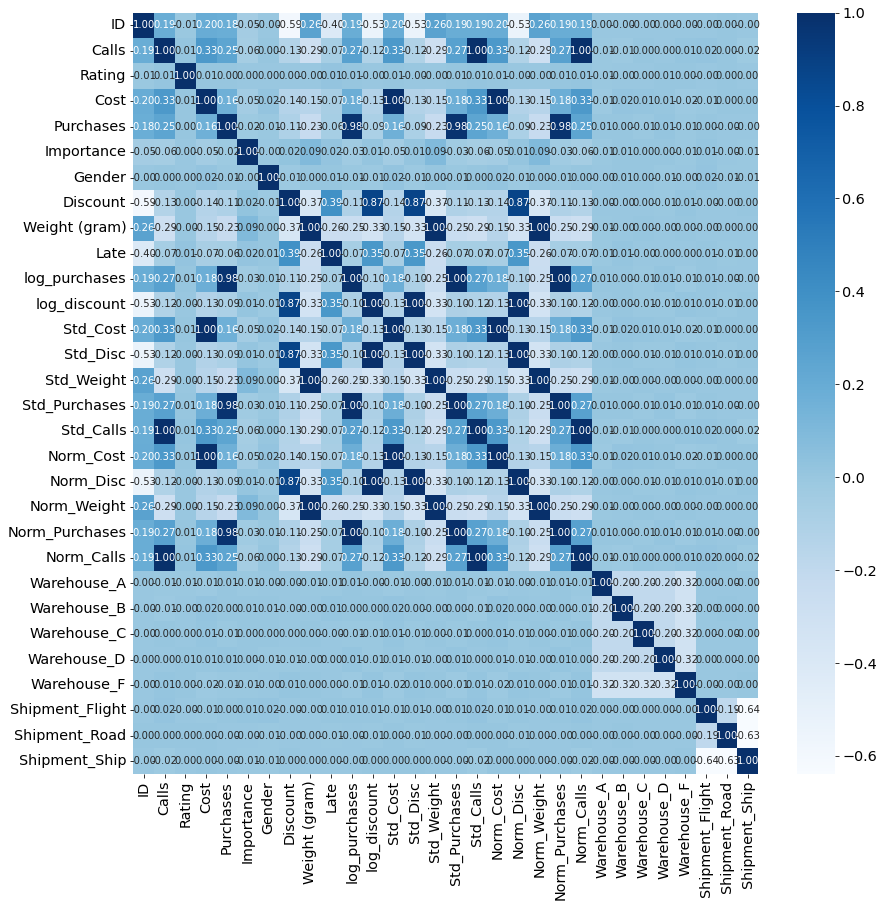

In [83]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

<b> Analisis Heatmap plot: </b>

- Menghapus feature  <b>ID </b> dikarenakan feature tersebut tidak memiliki arti penting untuk kegunaan proses modelling. <br>
- Menghapus feature <b> Warehouse </b> dan <b> Shipment </b> karena sudah dilakukan feature encoding. <br>
- Dari heatmap plot, tidak ada feature yang perlu dihapus karena tidak ada feature yang redundant dengan nilai korelasi antar feature > 0.7.

In [84]:
df.drop(columns=['ID', 'Warehouse', 'Shipment' ], inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10642 non-null  int64  
 1   Rating           10642 non-null  int64  
 2   Cost             10642 non-null  int64  
 3   Purchases        10642 non-null  int64  
 4   Importance       10642 non-null  int64  
 5   Gender           10642 non-null  int64  
 6   Discount         10642 non-null  int64  
 7   Weight (gram)    10642 non-null  int64  
 8   Late             10642 non-null  int64  
 9   log_purchases    10642 non-null  float64
 10  log_discount     10642 non-null  float64
 11  Std_Cost         10642 non-null  float64
 12  Std_Disc         10642 non-null  float64
 13  Std_Weight       10642 non-null  float64
 14  Std_Purchases    10642 non-null  float64
 15  Std_Calls        10642 non-null  float64
 16  Norm_Cost        10642 non-null  float64
 17  Norm_Disc   

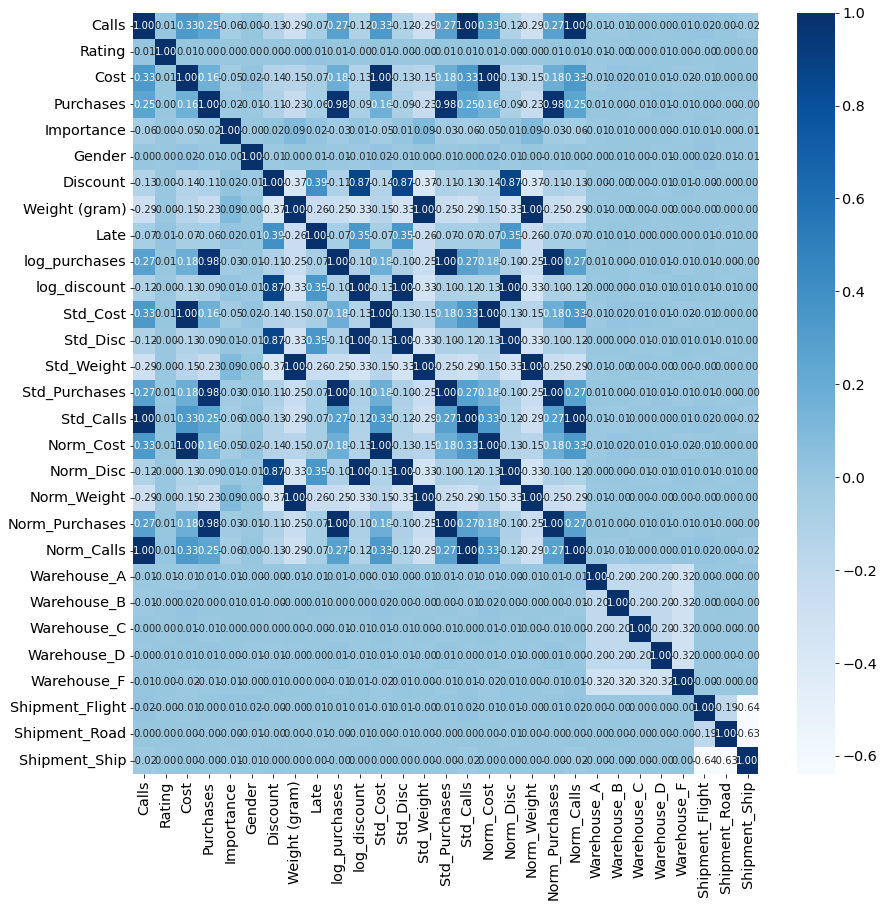

In [86]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### B. Feature Extraction

In [87]:
df

,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,log_purchases,...,Norm_Purchases,Norm_Calls,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
0,4,2,177,3,0,0,44,1233,1,1.098612,...,0.292481,0.4,0,0,0,1,0,1,0,0
1,4,5,216,2,0,1,59,3088,1,0.693147,...,0.000000,0.4,0,0,0,0,1,1,0,0
2,2,2,183,4,0,1,48,3374,1,1.386294,...,0.500000,0.0,1,0,0,0,0,1,0,0
3,3,3,176,4,1,1,10,1177,1,1.386294,...,0.500000,0.2,0,1,0,0,0,1,0,0
4,2,2,184,3,1,0,46,2484,1,1.098612,...,0.292481,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,0,1,1538,1,1.609438,...,0.660964,0.4,1,0,0,0,0,0,0,1
10995,4,1,232,5,1,0,6,1247,0,1.609438,...,0.660964,0.4,0,1,0,0,0,0,0,1
10996,5,4,242,5,0,0,4,1155,0,1.609438,...,0.660964,0.6,0,0,1,0,0,0,0,1
10997,5,2,223,6,1,1,2,1210,0,1.791759,...,0.792481,0.6,0,0,0,0,1,0,0,1


Tidak ada fitur yang bisa diekstraksi dari dataset.

### C. Feature Tambahan

<b> 1. Waktu pengiriman <br> </b>
Bisa dilakukan analisis regresi untuk memprediksi waktu pengiriman customer di waktu yang akan datang.

<b> 2. Alamat customer (Kota-Provinsi/Luar negeri) <br> </b>
Jika jauh, potensi terlambat makin besar karena makin banyak peluang mengalami kendala pengiriman. <br>
Jika di luar negeri, potensi terlambat makin besar karena penyesuaian regulasi import dan eskport pengiriman barang. <br>

<b> 3. Alamat warehouse <br> </b>
Bisa digunakan untuk merekomendasikan warehouse mana yang paling dekat dengan alamat customer agar potensi keterlambatan dapat direduksi. <br>

<b> 4. Musim <br> </b>
Pada musim hujan atau musim dingin, moda pengiriman kapal bisa terkendala karena cuaca buruk bisa mengakibatkan dilarangnya kapal berlayar.

<b> 5. Kapasitas Pengiriman Per Hari <br> </b>
Makin sedikit kapasitas, potensi terlambat makin besar karena makin sedikit pengiriman dilakukan.

<b> 6. Traffic Route <br> </b>
Makin padat rute yang dipilih, potensi terlambat makin besar karena durasi pengiriman makin lama.

In [89]:
# eksport dataframe yang sudah dipreprocessing untuk digunakan saat proses modelling

df.to_csv('Ecommerce_finpro4.csv', index = False)

# <center> Final Project - Stage 3 (Supervised Learning) </center>

**Kelompok : "ASKLEPIOS"** <br>
**Nama Anggota :** <br>
        - Awalsyah Rinanto Putra <br>
        - Fathah Oscar <br>
        - M Rizky Septiansyah <br>
        - Hermawan Febrianto <br>
        - Devi Puji Ayuningsih <br>
        - Anggita Citanegara Lubis

In [68]:
#import library 

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Data Preparation

## 1A. Load Data

In [17]:
import pandas as pd

df =pd.read_csv("Ecommerce_finpro4.csv")
df.sample(5)

,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,log_discount,...,Norm_Purchases,Norm_Calls,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
8146,4,5,182,2,1,0,10,5098,1,2.302585,...,0.000000,0.4,0,0,0,0,1,0,0,1
4084,5,4,237,3,2,1,9,5401,0,2.197225,...,0.292481,0.6,0,0,0,0,1,0,0,1
4510,3,5,267,2,2,1,1,4195,1,0.000000,...,0.000000,0.2,1,0,0,0,0,0,1,0
7639,6,4,306,4,0,0,8,1465,0,2.079442,...,0.500000,0.8,0,0,0,0,1,1,0,0
1541,4,5,270,3,1,1,20,3185,1,2.995732,...,0.292481,0.4,1,0,0,0,0,1,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10642 entries, 0 to 10641
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10642 non-null  int64  
 1   Rating           10642 non-null  int64  
 2   Cost             10642 non-null  int64  
 3   Purchases        10642 non-null  int64  
 4   Importance       10642 non-null  int64  
 5   Gender           10642 non-null  int64  
 6   Discount         10642 non-null  int64  
 7   Weight (gram)    10642 non-null  int64  
 8   Late             10642 non-null  int64  
 9   log_discount     10642 non-null  float64
 10  log_purchases    10642 non-null  float64
 11  Std_Cost         10642 non-null  float64
 12  Std_Disc         10642 non-null  float64
 13  Std_Weight       10642 non-null  float64
 14  Std_Purchases    10642 non-null  float64
 15  Std_Calls        10642 non-null  float64
 16  Norm_Cost        10642 non-null  float64
 17  Norm_Disc   

<b> Bagi dataset jadi 2, yaitu dataset normalisasi dan dataset standarisasi </b>

In [19]:
# dfS hapus kolom normalisasi (modeling standarisasi)
dfs = df.drop(columns=['Norm_Cost', 'Norm_Disc','Norm_Weight','Norm_Purchases','Norm_Calls'])

In [20]:
dfs.shape

(10642, 24)

In [21]:
# dfn hapus kolom standarisasi (modeling normalisasi)
dfn = df.drop(columns=['Std_Cost', 'Std_Disc','Std_Weight','Std_Purchases','Std_Calls'])

In [22]:
dfn.shape

(10642, 24)

## 1B. Cek Class Imbalance

In [23]:
# Class imbalance

df.Late.value_counts(normalize=True)

1    0.590303
0    0.409697
Name: Late, dtype: float64

<b> Target dataset sudah lumayan balance karena minority class > 40 % </b>

## 1C. Feature Importance & Target

### Dataset Standardization

In [24]:
# hapus Late (target) + 'Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram), 'log_purchase', 'log_discount' pada dfs

Xs = dfs.drop(columns=[ 'Late', 'Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram)',
                     'log_purchases', 'log_discount']) #drop feature yang sudah ditransformasi
ys = dfs['Late'] #target

### Dataset Normalization

In [27]:
# hapus Late (target) + 'Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram), 'log_purchase', 'log_discount' pada dfs

Xn = dfn.drop(columns=[ 'Late', 'Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram)',
                     'log_purchases', 'log_discount']) #drop feature yang tidak signifikan
yn = dfn['Late'] #target

## 1D. Split Train and Test Dataset

### Dataset Standardization

In [28]:
# split train and test

from sklearn.model_selection import train_test_split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3, random_state=42)

### Dataset Normalization

In [29]:
# split train and test
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.3, random_state=42)

## 1D. Define Fungsi Metode Evaluasi

### Dataset Standardization

In [30]:
# pembuatan fungsi untuk mengeluarkan output skor evaluasi model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification_std(model):
    ys_pred = model.predict(Xs_test)
    ys_pred_train = model.predict(Xs_train)
    ys_pred_proba = model.predict_proba(Xs_test)
    ys_pred_proba_train = model.predict_proba(Xs_train)
    
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(ys_train, ys_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ys_test, ys_pred))
    print("Precision (Train Set): %.2f" % precision_score(ys_train, ys_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(ys_test, ys_pred))
    print("Recall (Train Set): %.2f" % recall_score(ys_train, ys_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(ys_test, ys_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(ys_train, ys_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(ys_test, ys_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ys_train, ys_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(ys_test, ys_pred_proba[:, 1]))

    score = cross_validate(model, Xs, ys, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [31]:
# pembuatan fungsi untuk melihat feature importance pada model decision tree

def show_feature_importance_std(model):
    feat_importances = pd.Series(model.feature_importances_, index=Xs.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [32]:
# pembuatan fungsi untuk melihat hyperparameter yang telah dituning

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Dataset Normalization

In [33]:
# pembuatan fungsi untuk mengeluarkan output skor evaluasi model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification_norm(model):
    yn_pred = model.predict(Xn_test)
    yn_pred_train = model.predict(Xn_train)
    yn_pred_proba = model.predict_proba(Xn_test)
    yn_pred_proba_train = model.predict_proba(Xn_train)
    
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(yn_train, yn_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(yn_test, yn_pred))
    print("Precision (Train Set): %.2f" % precision_score(yn_train, yn_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(yn_test, yn_pred))
    print("Recall (Train Set): %.2f" % recall_score(yn_train, yn_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(yn_test, yn_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(yn_train, yn_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(yn_test, yn_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(yn_train, yn_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(yn_test, yn_pred_proba[:, 1]))

    score = cross_validate(model, Xn, yn, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [34]:
# pembuatan fungsi untuk melihat feature importance pada model decision tree

def show_feature_importance_norm(model):
    feat_importances = pd.Series(model.feature_importances_, index=Xn.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [35]:
# pembuatan fungsi untuk melihat hyperparameter yang telah dituning

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# 2. Modelling

## 2A. Logistic Regression

### Fit Modelling (Data Standardization)

In [36]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logregs = LogisticRegression() # inisiasi object dengan nama logreg
logregs.fit(Xs_train, ys_train) # fit model regression dari data train
eval_classification_std(logregs)

Accuracy (Train Set): 0.62
Accuracy (Test Set): 0.63
Precision (Train Set): 0.66
Precision (Test Set): 0.67
Recall (Train Set): 0.74
Recall (Test Set): 0.72
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7141199070075464
roc_auc (crossval test): 0.696233287100099


nilai ROC-AUC underfitting (AUC data test lebih besar daripada data train), namun ROC-AUC pada crossval lebih besar data train daripada data test, langkah selanjutnya adalah mencoba tuning hyperparameter.

### Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada Logistic Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- C: nilai regularization
- penalty: menggukanan l2 norm (ridge), l1 (lasso), atau elastic net
- solver: metode bagaimana kita melakukan update pada variable di logistic regression (slope/intercept): liblinear bagus jika data sedikit; sag & saga bagus jika data besar (karena menggunakan metode sampling)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2'] # pakai lasso dan ridge
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)] # buat 100 iterasi antara 0.0001 sampai 0.05
hyperparameters = dict(penalty=penalty, C=C)

logregs = LogisticRegression()
rss = RandomizedSearchCV(logregs, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.62
Accuracy (Test Set): 0.63
Precision (Train Set): 0.66
Precision (Test Set): 0.67
Recall (Train Set): 0.74
Recall (Test Set): 0.73
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7140754209517693
roc_auc (crossval test): 0.6959115443320479


Masiih sama keadannya seperti sebelum tuning hyperparameter yaitu underfitting namun pada crossval ROC-AUC data train sudah lebih besar daripada data test. Langkah selanjutnya coba melihat learning curve.

param value: 0.0001; train: 0.707848088231673; test: 0.7167929954644565
param value: 0.010199999999999999; train: 0.709955014143422; test: 0.71660819309381
param value: 0.0203; train: 0.7101031264759935; test: 0.7164759603253169
param value: 0.0304; train: 0.710149015183566; test: 0.7164136855658431
param value: 0.0405; train: 0.7101852038391313; test: 0.7163999365929722
param value: 0.0506; train: 0.7102114685953353; test: 0.7163692035947902
param value: 0.060700000000000004; train: 0.7102254217470689; test: 0.7163631378714649
param value: 0.0708; train: 0.7102298986941491; test: 0.7163590940559146
param value: 0.0809; train: 0.710232883325536; test: 0.7163514108063691
param value: 0.091; train: 0.7102379571988937; test: 0.7163449407014888
param value: 0.1011; train: 0.7102399718250797; test: 0.716333213636393
param value: 0.1112; train: 0.7102463887825614; test: 0.7163356399257232
param value: 0.1213; train: 0.7102478810982549; test: 0.7163376618334985
param value: 0.1314; train: 0.7

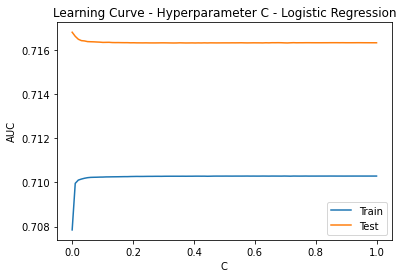

In [38]:
# Draw the learning curve

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve_std(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c) #ini bisa diutak-atik
        model.fit(Xs_train, ys_train)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train)
        train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test)
        test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()
    

param_values = [float(x) for x in np.linspace(0.0001, 1, 100)] #ini bisa diutak atik
draw_learning_curve_std(param_values)

Terlihat ROC-AUC data test selalu di atas data train dengan keadan garis sejajar, sehingga bisa disimpulkan pada metode logistic regression, keadaan selalu underfitting.

In [39]:
show_best_hyperparameter(rss)

{'C': 0.028830303030303032, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Cek Feature Importance

In [41]:
# lihat feature importance lewat coef
logregs = LogisticRegression() 
logregs.fit(Xs_train, ys_train)

logregs.coef_

array([[ 0.01941908,  0.15201747,  0.06637133, -0.12838992,  0.64570857,
        -0.54518458, -0.20421083, -0.15129833, -0.0635537 ,  0.07111631,
        -0.02191284,  0.01635733, -0.00204248, -0.02315807,  0.02507309,
        -0.0019504 ]])

In [42]:
# menyimpan array

ft_logregs =  np.array([ 0.01941908,  0.15201747,  0.06637133, -0.12838992,  0.64570857,
        -0.54518458, -0.20421083, -0.15129833, -0.0635537 ,  0.07111631,
        -0.02191284,  0.01635733, -0.00204248, -0.02315807,  0.02507309,
        -0.0019504 ])

In [43]:
# mapping nilai coef dengan featurenya

Xs.columns

Index(['Rating', 'Importance', 'Gender', 'Std_Cost', 'Std_Disc', 'Std_Weight',
       'Std_Purchases', 'Std_Calls', 'Warehouse_A', 'Warehouse_B',
       'Warehouse_C', 'Warehouse_D', 'Warehouse_F', 'Shipment_Flight',
       'Shipment_Road', 'Shipment_Ship'],
      dtype='object')

In [44]:
# buat dataframe baru yang berisi nama feature beserta nilai koefisiennya

dft1 = pd.DataFrame({'Feature Names' : Xs.columns, 'Importances' : ft_logregs}).sort_values(by = 'Importances')
dft1

,Feature Names,Importances
5,Std_Weight,-0.545185
6,Std_Purchases,-0.204211
7,Std_Calls,-0.151298
3,Std_Cost,-0.128390
8,Warehouse_A,-0.063554
13,Shipment_Flight,-0.023158
10,Warehouse_C,-0.021913
12,Warehouse_F,-0.002042
15,Shipment_Ship,-0.001950
11,Warehouse_D,0.016357


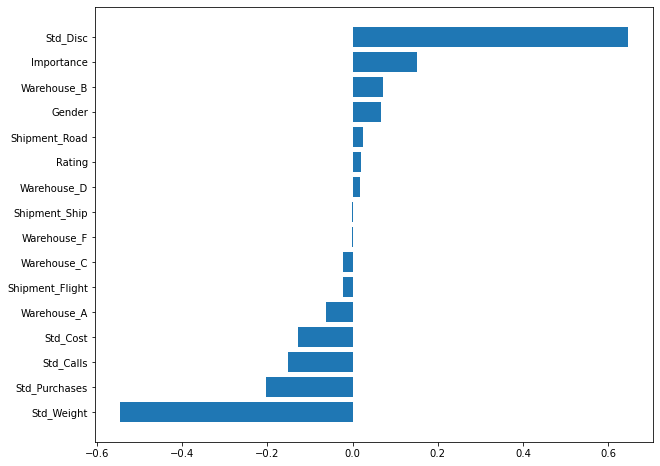

In [45]:
# membuat plot bar feature importance

fig = plt.figure(figsize = (10, 8))
plt.barh(dft1['Feature Names'], dft1['Importances'])
plt.show()

Terlihat feature Discount memiliki koefisien yang paling tinggi dengan korelasi positif, disusul Weight dengan korelasi negatif.

### Fit Modelling Data (Normalization)

In [46]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logregn = LogisticRegression() # inisiasi object dengan nama logreg
logregn.fit(Xn_train, yn_train) # fit model regression dari data train
eval_classification_norm(logregn)

Accuracy (Train Set): 0.62
Accuracy (Test Set): 0.63
Precision (Train Set): 0.66
Precision (Test Set): 0.67
Recall (Train Set): 0.74
Recall (Test Set): 0.73
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7141127326545897
roc_auc (crossval test): 0.6961962492889116


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## B. K-Nearest Neighbor

### Fit Modelling (Data Standardization)

In [47]:
# K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knns = KNeighborsClassifier() # inisiasi object dengan nama knn
knns.fit(Xs_train, ys_train) # fit model KNN dari data train
eval_classification_std(knns)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.62
Precision (Train Set): 0.82
Precision (Test Set): 0.69
Recall (Train Set): 0.77
Recall (Test Set): 0.64
F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.69
roc_auc (crossval train): 0.8537416157442796
roc_auc (crossval test): 0.683885467380449


Terlihat overfitting cukup besar, sehingga harus melakukan tuning hyperparameter.

In [28]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knns.fit(Xs_train, ys_train)
rss = RandomizedSearchCV(knns, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.65
Precision (Train Set): 0.82
Precision (Test Set): 0.77
Recall (Train Set): 0.61
Recall (Test Set): 0.58
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.66
roc_auc (train-proba): 0.78
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7828674015776141
roc_auc (crossval test): 0.7006896913136376


Hasil terlihat jauh lebih bagus namun masih agak overfitting, cek learning curve untuk analisis lebih lanjut.

param value: 1; train: 1.0; test: 0.6215484012370841
param value: 2; train: 0.9255206875993789; test: 0.6644300322858234
param value: 3; train: 0.8898919488822182; test: 0.6877135134610531
param value: 4; train: 0.8659574436333709; test: 0.692652427583351
param value: 5; train: 0.8486357249930794; test: 0.6944966096650427
param value: 6; train: 0.8349127629553522; test: 0.7041894333482146
param value: 7; train: 0.8278542589570652; test: 0.7040003849712404
param value: 8; train: 0.82346871621304; test: 0.7048235036264938
param value: 9; train: 0.8159516609100588; test: 0.7074717984303527
param value: 10; train: 0.810431547852222; test: 0.7120083529054007
param value: 11; train: 0.8058216727515839; test: 0.7148960415898342
param value: 12; train: 0.8028705438520698; test: 0.7134898047322347
param value: 13; train: 0.7985286886499691; test: 0.7158807106763201
param value: 14; train: 0.7965357756571972; test: 0.7172980680266828
param value: 15; train: 0.7961742994883595; test: 0.7197441720

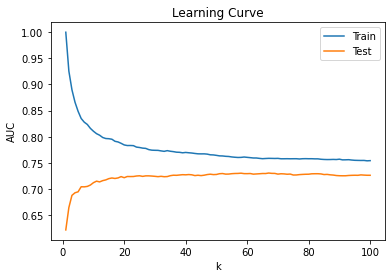

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve_knn(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(Xs_train, ys_train)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train)
        train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test)
        test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve_knn(param_values)

Pada nilai k di antara 60 dan 100 kemungkinan best fit (AUC data train sedikit lebih besar daripada data test)

param value: 60; train: 0.7604765784782708; test: 0.7292687730093105
param value: 61; train: 0.7599020742441981; test: 0.7295221180535336
param value: 62; train: 0.7592569088620421; test: 0.7283148369210065
param value: 63; train: 0.7592387399184748; test: 0.7287125461803736
param value: 64; train: 0.7585007898080809; test: 0.729083161875554
param value: 65; train: 0.7579112878012892; test: 0.7295429437036174
param value: 66; train: 0.7582979467974532; test: 0.7295025055481149
param value: 67; train: 0.7585771217557989; test: 0.7304370313217777
param value: 68; train: 0.7584746742834461; test: 0.7298148902993719
param value: 69; train: 0.7583314865926627; test: 0.7297311833174815
param value: 70; train: 0.758507729076055; test: 0.728360329845947
param value: 71; train: 0.7577543708061265; test: 0.7290732545274557
param value: 72; train: 0.7577736216785718; test: 0.7287932203006012
param value: 73; train: 0.7578781210850031; test: 0.7281415594246783
param value: 74; train: 0.75773676148

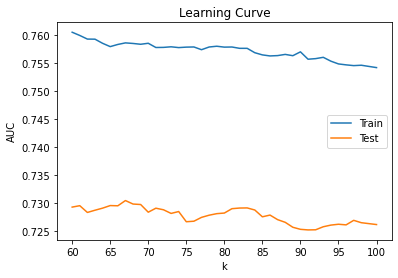

In [49]:
param_values = [int(x) for x in np.linspace(60, 100, 40)]
draw_learning_curve_knn(param_values)

Pada k = 83 sudah bestfit. Masukan nilai k = 83 pada parameter n_neighbors.

In [50]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [83]
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knns.fit(Xs_train, ys_train)
rss = RandomizedSearchCV(knns, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.66
Precision (Train Set): 0.81
Precision (Test Set): 0.78
Recall (Train Set): 0.60
Recall (Test Set): 0.58
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.66
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7600115917437913
roc_auc (crossval test): 0.6980354862445988


ROC-AUC pada data train dan data test sudah bestfit.

In [52]:
# cek parameter yang digunakan pada tuning hyperparameter

show_best_hyperparameter(rss)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 83, 'p': 1, 'weights': 'uniform'}


### Fit Modelling (Data Normalization)

In [32]:
# KNN
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(Xn_train, yn_train) # fit model KNN dari data train
eval_classification_norm(knn)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.60
Precision (Train Set): 0.80
Precision (Test Set): 0.66
Recall (Train Set): 0.78
Recall (Test Set): 0.67
F1-Score (Train Set): 0.79
F1-Score (Test Set): 0.66
roc_auc (train-proba): 0.83
roc_auc (test-proba): 0.65
roc_auc (crossval train): 0.8339882708732429
roc_auc (crossval test): 0.6224328960590518


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## C. Decision Tree

### Fit Modelling (Data Standardization)

In [53]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dts = DecisionTreeClassifier() # inisiasi object dengan nama dt
dts.fit(Xs_train, ys_train) # fit model decision tree dari data train
eval_classification_std(dts)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.64
Precision (Train Set): 1.00
Precision (Test Set): 0.69
Recall (Train Set): 1.00
Recall (Test Set): 0.70
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.69
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.62
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6071036700408874


Overfitting, lakukan hyperparameter tuning 

### Cek Feature Importance

In [54]:
def show_feature_importance_std(model):
    feat_importances = pd.Series(model.feature_importances_, index=Xs.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


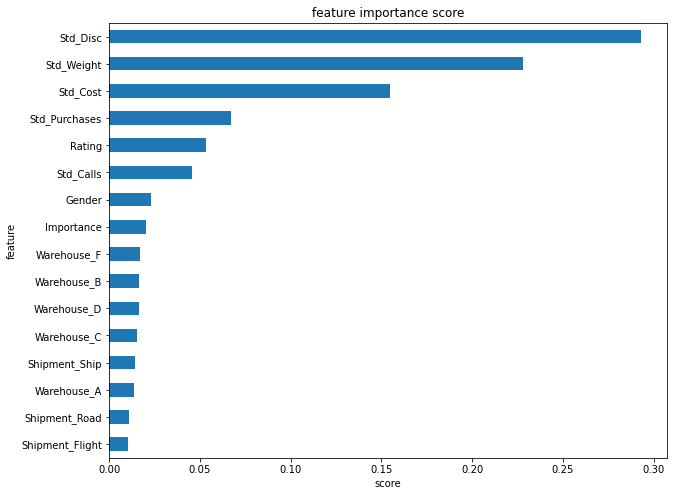

In [55]:
show_feature_importance_std(dts)

Feature diskon, weight, cost, purchases rating dan calls terlihat punya pengaruh yang cukup besar terhadap target dibanding feature lainnya.

### Hyperparameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dts = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dts, hyperparameters, cv=5, scoring='roc_auc', random_state = 42)
model.fit(Xs_train, ys_train)

# Predict & Evaluation
ys_pred = model.predict(Xs_test)#Check performa dari model
eval_classification_std(model)

Accuracy (Train Set): 0.70
Accuracy (Test Set): 0.65
Precision (Train Set): 0.80
Precision (Test Set): 0.75
Recall (Train Set): 0.65
Recall (Test Set): 0.61
F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.826116955620767
roc_auc (crossval test): 0.7009517122799869


ROC-AUC menjadi lebih baik setelah tuning hyperparameter, namun masih agak overfitting, selanjutnya coba analisa dlearning curve untuk medapat parameter yang tepat.

param value: 1; train: 1.0; test: 0.6236608904805346
param value: 2; train: 0.9927080605193707; test: 0.6442307692307692
param value: 3; train: 0.9760483704285707; test: 0.664588145473838
param value: 4; train: 0.9611481951560925; test: 0.6849406691382467
param value: 5; train: 0.945480783077737; test: 0.6912413381470913
param value: 6; train: 0.9322198046707988; test: 0.7043441092930116
param value: 7; train: 0.9219446888111392; test: 0.6967079701986969
param value: 8; train: 0.9121717744902064; test: 0.7121614113239775
param value: 9; train: 0.9029912348837748; test: 0.7225538150973427
param value: 10; train: 0.8943514358688522; test: 0.7241972217369643
param value: 11; train: 0.8884297779658096; test: 0.7239485270806241
param value: 12; train: 0.8807834508158864; test: 0.7244635069909483
param value: 13; train: 0.8763994376954467; test: 0.7144069420990314
param value: 14; train: 0.8733147465413718; test: 0.7181027873211825
param value: 15; train: 0.8696929709692367; test: 0.71807953

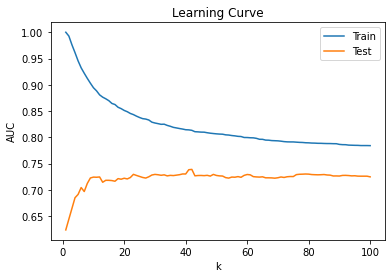

In [57]:
# Analyzing Learning Curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve_dt(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i) #bahan tuning
        model.fit(Xs_train, ys_train)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train)
        train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test)
        test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve_dt(param_values)

Cek nilai k di sekitar 80 dimana selisih ROC AUC data train dan data test tidak terlalu besar (bestfit).

param value: 70; train: 0.7932255582939549; test: 0.7229784157301189
param value: 71; train: 0.792598860318505; test: 0.7244556215506253
param value: 72; train: 0.7917784970739418; test: 0.723530800934283
param value: 73; train: 0.7913185653772313; test: 0.7248911404853873
param value: 74; train: 0.7911825034938842; test: 0.725322211223044
param value: 75; train: 0.7911682145711196; test: 0.7252552860756873
param value: 76; train: 0.7907320480018265; test: 0.7289389998511876
param value: 77; train: 0.7903428147610915; test: 0.7295920760625529
param value: 78; train: 0.7901351590323527; test: 0.7297930536954004
param value: 79; train: 0.7896275851571296; test: 0.7300955310985591
param value: 80; train: 0.789445186871502; test: 0.7298636182767522
param value: 81; train: 0.7890222272960956; test: 0.7290572814560323
param value: 82; train: 0.7888945223806315; test: 0.7287792691369527
param value: 83; train: 0.7885592736601058; test: 0.7285768761686627
param value: 84; train: 0.788508646850

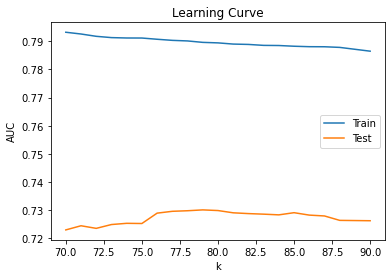

In [58]:
# Analyzing Learning Curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve_dt(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(Xs_train, ys_train)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train)
        train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test)
        test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(70, 90, 20)] #ubah k disini
draw_learning_curve_dt(param_values)

Niai k = 85 sudah bestfit, selanjutnya masukan nilai 83 pada parameter min_samples leaf.

In [59]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [83] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dts = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dts, hyperparameters, cv=5, scoring='roc_auc', random_state = 42)
model.fit(Xs_train, ys_train)

# Predict & Evaluation
ys_pred = model.predict(Xs_test)#Check performa dari model
eval_classification_std(model)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.65
Precision (Train Set): 0.78
Precision (Test Set): 0.74
Recall (Train Set): 0.65
Recall (Test Set): 0.62
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7652969307785195
roc_auc (crossval test): 0.7022248520829373


Model sudah bestfit

In [60]:
show_best_hyperparameter(model)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 79, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 83, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}



### Fit Modelling (Data Normalization)

In [63]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(Xn_train, yn_train) # fit model decision tree dari data train
eval_classification_norm(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.64
Precision (Train Set): 1.00
Precision (Test Set): 0.69
Recall (Train Set): 1.00
Recall (Test Set): 0.70
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.70
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.63
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6081290795038696


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## D. Random Forest

### Fit Modelling (Data Standardization)

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(random_state=42)
rfs.fit(Xs_train, ys_train)
eval_classification_std(rfs)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.65
Precision (Train Set): 1.00
Precision (Test Set): 0.73
Recall (Train Set): 1.00
Recall (Test Set): 0.63
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.68
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.72
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7206231473758058


Model terlalu overfitting, lakukan hyperparameter tuning.

### Cek feature Importance

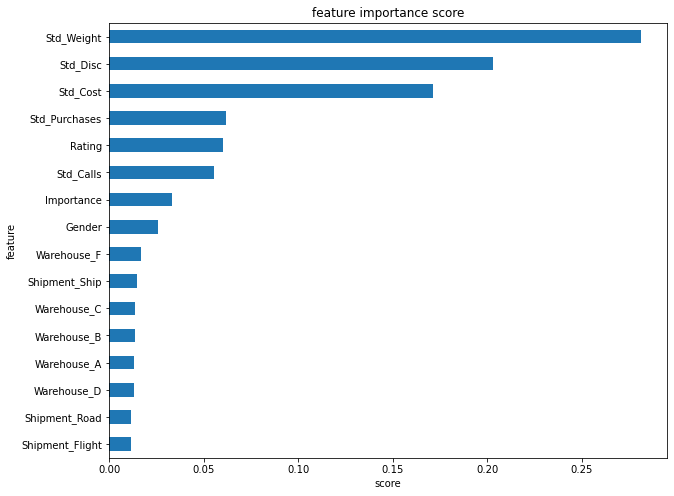

In [49]:
show_feature_importance_std(rfs)

Fitur Weight, Discount dan Cost punya nilai terbesar mempengaruhi target pada algoritma Random Forest.

In [109]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.66
Precision (Train Set): 0.94
Precision (Test Set): 0.77
Recall (Train Set): 0.79
Recall (Test Set): 0.61
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.94
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.8932759063080116
roc_auc (crossval test): 0.717083457426584


Model masih terlalu overfitting, cek learning curve!

param value: 1; train: 0.8660669796052676; test: 0.6344146091733147
param value: 1; train: 0.8555619352051448; test: 0.6138898189664654
param value: 1; train: 0.853752129347955; test: 0.6133099358165595
param value: 2; train: 0.9450210006125956; test: 0.669471861513875
param value: 2; train: 0.9472519379584674; test: 0.6670041230743351
param value: 3; train: 0.9731646195826141; test: 0.683288163913637
param value: 3; train: 0.9720473601308461; test: 0.6796950316064624
param value: 4; train: 0.9861902598047005; test: 0.7078848741888106
param value: 4; train: 0.9854365657637411; test: 0.6917862422924875
param value: 5; train: 0.9917643946906392; test: 0.705804331088207


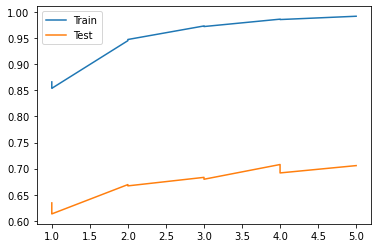

In [110]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=c) #cek param n estimator
    model.fit(Xs_train, ys_train)

    # eval on train
    ys_pred_train_proba = model.predict_proba(Xs_train)
    train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    ys_pred_proba = model.predict_proba(Xs_test)
    test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

c = 2 paling bestfit, masukan nilai c= 2 pada parameter n_estimators. selanjutnya coba tuning pada parameter max_depth

param value: 1; train: 0.5510615587685113; test: 0.5428163234276028
param value: 1; train: 0.6758932815201324; test: 0.6870448685598193
param value: 1; train: 0.5189772190547821; test: 0.5178722493966628
param value: 2; train: 0.7252405799437248; test: 0.7297651513681037
param value: 2; train: 0.7253676133171268; test: 0.7342588413983191
param value: 3; train: 0.7352302904270186; test: 0.7406794095382288
param value: 3; train: 0.7412121259603984; test: 0.741025155767775
param value: 4; train: 0.7446496751601815; test: 0.7361060563416733
param value: 4; train: 0.7325809077607132; test: 0.7192690237258745
param value: 5; train: 0.7513309217511729; test: 0.7297900208337378


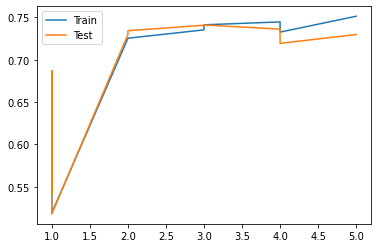

In [111]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 5, 10)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators= 2, max_depth = c) # c = 2 dan tuning max_depth 
    model.fit(Xs_train, ys_train)

    # eval on train
    ys_pred_train_proba = model.predict_proba(Xs_train)
    train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    ys_pred_proba = model.predict_proba(Xs_test)
    test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Pada max depth = 5 model sudah bestfit

In [112]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [2]
criterion = ['gini', 'entropy']
max_depth = [5]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.67
Accuracy (Test Set): 0.65
Precision (Train Set): 0.75
Precision (Test Set): 0.73
Recall (Train Set): 0.67
Recall (Test Set): 0.64
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7530222529629895
roc_auc (crossval test): 0.7129944375135076


In [113]:
show_best_hyperparameter(rss)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Fit Modelling (Data Normalization)

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(random_state=42)
rfs.fit(Xn_train, yn_train)
eval_classification_norm(rfs)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.65
Precision (Train Set): 1.00
Precision (Test Set): 0.73
Recall (Train Set): 1.00
Recall (Test Set): 0.63
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.68
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.72
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7209114987885756


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## 5. Adaboost

### Fit Modelling (Data Standardization)

In [63]:
from sklearn.ensemble import AdaBoostClassifier
clfs = AdaBoostClassifier()
clfs.fit(Xs_train, ys_train)
eval_classification_std(clfs)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.66
Precision (Train Set): 0.80
Precision (Test Set): 0.78
Recall (Train Set): 0.61
Recall (Test Set): 0.59
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7589001182826435
roc_auc (crossval test): 0.7119999926723677


Model sudah cukup bestfit, coba lakukan tuning hyperparameter.

In [185]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
abs = AdaBoostClassifier(random_state=42)
abs_tuned = RandomizedSearchCV(abs, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
abs_tuned.fit(Xs_train,ys_train)

# Predict & Evaluation
eval_classification_std(abs_tuned)

Accuracy (Train Set): 0.67
Accuracy (Test Set): 0.67
Precision (Train Set): 0.77
Precision (Test Set): 0.76
Recall (Train Set): 0.63
Recall (Test Set): 0.63
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.69
roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7581563215328401
roc_auc (crossval test): 0.71201036430838


Model sebelum tuning hyperparameter ternyata lebih baik karena nilai ROC-AUC lebih tinggi yaitu 0.76 dibanding 0.75 dengan gap ROC-AUC tidak terlalu jauh hanya berbededa 1%. Oleh karena itu ambil modeling sebelum tuning hyperparameter.

In [118]:
show_best_hyperparameter(abs_tuned)

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.08358291457286432, 'n_estimators': 225, 'random_state': 42}


### Feature Imporrance Adaboost

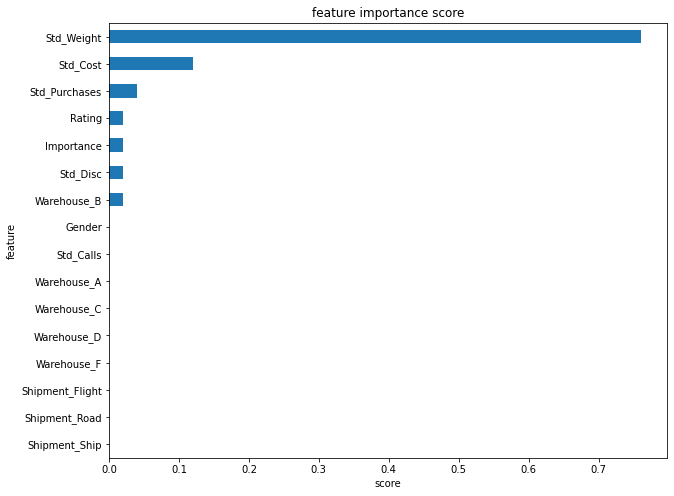

In [64]:
show_feature_importance_std(clfs)

Dari bar chart feature importance pada Adaboost di atas, terlihat feature Weight punya nilai pengaruh terbesar terhadap target, disusul feature Cost, Purchases, Rating, Product Importance dan Discount.

### Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix # import package dari sklearn
confusion_matrix(ys_test, ys_pred) # lihat hasil confusion matrix-nya

array([[ 918,  403],
       [ 710, 1162]], dtype=int64)

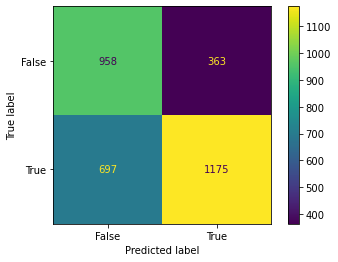

In [186]:
from sklearn import metrics

# perdiksi target
ys_pred = abs_tuned.predict(Xs_test)

# buat confusion matrix
confusion_matrix = metrics.confusion_matrix(ys_test, ys_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Fit Modelling (Data Normalization)

In [119]:
from sklearn.ensemble import AdaBoostClassifier
clfn = AdaBoostClassifier()
clfn.fit(Xn_train, yn_train)
eval_classification_norm(clfn)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.66
Precision (Train Set): 0.80
Precision (Test Set): 0.78
Recall (Train Set): 0.61
Recall (Test Set): 0.59
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7589001182826435
roc_auc (crossval test): 0.7119999926723677


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## F. XGBoost

### Fit Modelling (Data Standardization)

In [18]:
from xgboost import XGBClassifier

xgs = XGBClassifier()
xgs.fit(Xs_train, ys_train)
eval_classification_std(xgs)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.64
Precision (Train Set): 0.97
Precision (Test Set): 0.71
Recall (Train Set): 0.89
Recall (Test Set): 0.64
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.71
roc_auc (crossval train): 0.9755223208774412
roc_auc (crossval test): 0.7221942559637166


Model masih sangat overfit, coba lakukan tuning hyperparameter

In [19]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xgs = XGBClassifier(random_state=42)
xgs_tuned = RandomizedSearchCV(xgs, hyperparameters, cv=5, random_state=42, scoring='recall')
xgs_tuned.fit(Xs_train,ys_train)

# Predict & Evaluation
eval_classification_std(xgs_tuned)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.64
Precision (Train Set): 0.73
Precision (Test Set): 0.69
Recall (Train Set): 0.74
Recall (Test Set): 0.71
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.78
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.8928550440988616
roc_auc (crossval test): 0.7229920816448401


Model sudah lumayan best-fit dengan selisih ROC-AUC pada data train dan test sebesar 5%.

In [20]:
show_best_hyperparameter(xgs_tuned)

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.4, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.13131313, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 90, 'max_leaves': 0, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0.300000012, 'reg_lambda': 0, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'hist', 'validate_parameters': 1, 'verbosity': None, 'lambda': 0.0, 'eta': 0.13131313131313133, 'alpha': 0.30000000000000004}


### Fit Modelling (Data Normalization)

In [21]:
from xgboost import XGBClassifier

xgn = XGBClassifier()
xgn.fit(Xn_train, yn_train)
eval_classification_norm(xgn)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.64
Precision (Train Set): 0.97
Precision (Test Set): 0.71
Recall (Train Set): 0.89
Recall (Test Set): 0.64
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.71
roc_auc (crossval train): 0.9755223208774412
roc_auc (crossval test): 0.7227071909548684


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

# 3. SHAP Values Feature Importances

In [104]:
!pip install shap

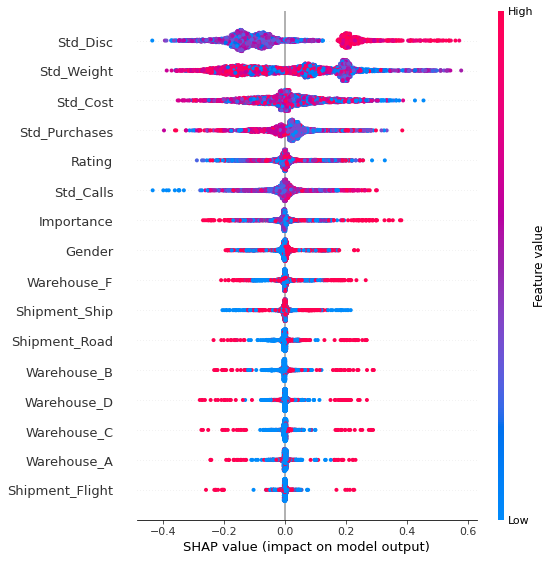

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtsh = DecisionTreeClassifier()
dtsh.fit(Xs_train, ys_train)

import shap
explainer = shap.TreeExplainer(dtsh)
shap_values = explainer.shap_values(Xs_test)
shap.summary_plot(shap_values[1], Xs_test) # Summary shap value terhadap label positive

Interpretasi : <br>
1. Feature Discount dan Weight memiliki importance terbesar dibanding feature-feature yang lain.
2. Feature Discount berkolerasi secara positif, artinya makin banyak diskon diberikan makin tinggi peluang terjadinya pengiriman terlambat.
3. Feature Weight berkolerasi secara negatif, artinya pada barang-barang yang beratnya rendah punya peluang terjadinya pengiriman terlambat yang makin tinggi.

# 4. Impact on Business Insight

In [69]:
# load dataset awal

df2 = pd.read_csv('Ecommerce_finpro.csv')

# Rename kolom
df2 = df2.rename(columns={'Warehouse_block':'Warehouse','Mode_of_Shipment':'Shipment','Customer_care_calls':'Calls',
                        'Customer_rating':'Rating','Cost_of_the_Product':'Cost','Prior_purchases':'Purchases',

                        'Product_importance':'Importance','Discount_offered':'Discount','Weight_in_gms':'Weight (gram)','Reached.on.Time_Y.N':'Late'})
df2

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## A. Ontime Rate

In [70]:
# target pada dataset awal

df2['Late'].value_counts()

1    6563
0    4436
Name: Late, dtype: int64

In [71]:
# Class imbalance

df2.Late.value_counts(normalize=True)

1    0.596691
0    0.403309
Name: Late, dtype: float64

In [68]:
# lihat nilai evaluasi model yang digunakan (Adaboost)

from sklearn.ensemble import AdaBoostClassifier
clfs = AdaBoostClassifier()
clfs.fit(Xs_train, ys_train)
eval_classification_std(clfs)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.66
Precision (Train Set): 0.80
Precision (Test Set): 0.78
Recall (Train Set): 0.61
Recall (Test Set): 0.59
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7589001182826435
roc_auc (crossval test): 0.7119999926723677


In [173]:
# mendefinisikan tiap variabel yang diperlukan

total_cust = 10999
total_custlate = 6563 # customer late
custlate_score = 0.596 # persentase customer late terhadap total customer
total_custontime = 4436 # customer ontime
custontime_score = 0.403 # persentase customer ontime terhadap total customer
eval_score = 0.74 #roc-auc test dataset model adaboost

In [90]:
print ('Pada saat pengiriman late:')

# menghtung jumlah customer yang terprediksi late pada saat pengiriman late (true positive) dengan model
custlate_pred  = total_custlate * eval_score
print('Predicted Late =' , custlate_pred)

# menghtung jumlah customer yang terprediksi ontime pada saat pengiriman late (false negative) dengan model
custontime_pred = total_custlate - custlate_pred
print('Predicted ontime' , custontime_pred)

Pada saat pengiriman late:
Predicted Late = 4856.62
Predicted ontime 1706.38


In [91]:
# prediksi ontime saat late = pengiriman late

# menghitung ontime rate yang terprediksi dengan menggunakan model 
ontime_rate  = (total_cust - custontime_pred) * 100 / total_cust
print ('ontime rate: ', ontime_rate)


ontime rate:  84.48604418583507


Model mampu meningkatkan ontime rate dari 40,3 % menjadi 84,48 %

## B. Customer Rating

In [80]:
# hitung total rating keseluruhan

total_rating = df2['Rating'].sum()
total_rating

32893

In [82]:
avg_rating = total_rating/total_cust
avg_rating

2.9905445949631786

Asumsi:
- tiap customer yang diberikan notif shipment akan terlambat dan memang terlambat, menaikan ratingnya 1 poin
- customer late bintang 5 tidak bisa menaikan ratingnya lagi


In [83]:
# melihat cust yang late dan memberi rating 5 

df2[(df2['Late'] == 1) & (df2['Rating'] == 5)]

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1
12,13,D,Flight,3,5,198,3,medium,F,1,3667,1
17,18,F,Ship,5,5,227,3,medium,M,36,3952,1
18,19,D,Ship,5,5,239,3,high,M,18,2495,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10900,10901,C,Ship,5,5,196,4,medium,M,8,4604,1
10903,10904,F,Ship,3,5,241,4,low,F,9,5526,1
10910,10911,A,Ship,5,5,264,8,high,F,10,5759,1
10963,10964,F,Flight,4,5,220,10,medium,M,8,4100,1


Ada 1317 cust yang late memberi rating 5.

In [120]:
# menghitung jumlah cust yang late dan sudah terprediksi late 

custlate_5 = 1317 # total cust late yang memberi rating 5
custlate_pred_5 = eval_score * custlate_5 # total cust late yang terprediksi late yang memberi rating 5 
cust_uprating = custlate_pred - custlate_pred_5 # jumlah cust late yang terprediksi late yang memberi rating < 5
cust_uprating

3882.04

In [190]:
#late  = 6563
#late_rating 5 = 1317
#late_rating<5 = 6563 - 1317 = cust_late -
#(late_rating<5)*rocauc

cust_uprating = (total_custlate - 1317) * eval_score
cust_uprating



3882.04

Ada 3882 customer yang bisa menaikan rating.

In [121]:
# menghitung total rating setelah ada customer yang bisa menaikan ratingnya

total_new_rating = total_rating + (cust_uprating)
total_new_rating

36775.04

In [118]:
avg_new_rating = total_new_rating / total_cust
avg_new_rating

3.3434894081280118

In [122]:
growth_rating = (avg_new_rating - avg_rating)*100 / avg_rating

growth_rating

11.802024746906635

## C. Potential Revenue Loss

Revenue loss occurs when a company makes less from operations than expected due to external and internal factors. The loss of potential customers, restrictions on business and changes in the market can all lead to significant revenue loss (https://smallbusiness.chron.com/revenue-loss-vs-negative-cash-outflow-31205.html).

Dalam studi kasus ini, potential revenue loss berasal dari customer yang mengalami late.

In [168]:
# menghitung total sale seluruh customer

total_sales = df2['Cost'].sum()
total_sales

2311955

In [170]:
df2

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,Disc_cost
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,77.88
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,127.44
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,87.84
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,17.60
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,84.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,2.52
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,13.92
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,9.68
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,4.46


In [159]:
# membuat kolom jumlah discount yang diterima tiap customer

df2['Disc_cost'] = (df2['Discount']/100) * df2['Cost']

In [171]:
df2

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,Disc_cost
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,77.88
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,127.44
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,87.84
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,17.60
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,84.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,2.52
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,13.92
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,9.68
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,4.46


In [167]:
# hitung total biaya discount yang diberikan

total_disc = df2['Disc_cost'].sum()
total_disc

297334.61999999994

In [178]:
# hitung total revenue, dimana total_revenue = total_sales - total_disc 

total_revenue = total_sales - total_disc
total_revenue

2014620.3800000001

In [179]:
# hitung total revenue dari seluruh customer late

revenue_late = total_revenue * custlate_score
revenue_late

1200713.74648

revenue dari seluruh customer late inilah yang menjadi potential revenue loss awal (sebelum modelling) 

selanjutnya hitung potential revenue loss setelah modelling, yaitu revenue dari seluruh customer late yang terprediksi ontime.

In [184]:
# hitung total revenue dari seluruh customer late yang terprediksi late

revenuelate_latepred = eval_score * revenue_late
revenuelate_latepred

888528.1723952

In [187]:
# total revenue dari seluruh customer late yang terprediksi ontime

revenuelate_ontimepred = revenue_late - revenuelate_latepred
print('potential revenue loss setelah modelling: ', revenuelate_ontimepred)

potential revenue loss setelah modelling:  312185.57408479997
